<a href="https://colab.research.google.com/github/lilasu086/Coding-Project/blob/main/YuChunSu_BA810_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab Notebook link: https://colab.research.google.com/drive/1529zKRSLLUgCWtCDsq3Vek_1ot8bzCG5?usp=sharing

# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the course folder on Google drive. **(20 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

FYI column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf):
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


###**Text Answer**###


1. Based on my observation, I'd propose the exclusion of the `name` variable from the regression analysis. This variable contains string values rather than numeric or categorical data, impeding its use in calculating its influence on the mpg (target) variable within the regression analysis. Consequently, I recommend excluding the `name` variable from the analysis.
2. In the Auto dataset, I categorized the variables into two types: numeric and categorical.
- **Target Variable(Numeric one)**: `mpg`
- **Numeric Variables**: `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `year`
- **Categorical Variable**: `origin`

The categorization choice is rooted in the unique characteristic of the 'origin' variable, representing varied geographical manufacturing types such as American, European, and Japanese origins of the car. The numerical entries in this column denote the distinct origins of cars rather than representing inherently numeric entities. Conversely, the remaining variables primarily encapsulate quantitative attributes, embodying measures like speed, size, quantity, and other metrics without inherent categorical distinctions. Hence, I consider all variables, except 'origin', as fundamentally numeric in nature.

###**Coding Answer**###

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/Colab Notebooks/BA810/'
auto = pd.read_csv(data_folder+'Auto.csv', na_values='?').dropna()
auto.info()
auto.head()
auto.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

###**Text Answer**###

1. One intriguing finding is the unexpected negative correlation between 'horsepower' and 'acceleration'. At first glance, one might anticipate a positive correlation, presuming that higher horsepower generally leads to quicker acceleration. However, the scatter plot reveals a contrary relationship between these two variables. Perhaps the discrepancy can be attributed to the design or performance configuration of the vehicle. In specific instances, the vehicle's intended design might elucidate this negative correlation. Some vehicles might prioritize high horsepower but not necessarily emphasize quicker acceleration as a primary objective. In such scenarios, despite boasting higher horsepower, other facets of the vehicle's design might impede faster acceleration. Consequently, despite the power output, certain design elements may hinder the vehicle's ability to accelerate swiftly.

2. Another intriguing observation is the absence of a positive correlation between 'mpg' and 'displacement'. Typically, larger engine displacement is linked to bigger and more powerful engines, which might suggest an increase in miles per gallon. Nevertheless, the scatter plot indicates a negative correlation between these variables. Upon deeper consideration, this discrepancy makes sense. Larger engine displacements are often associated with lower fuel efficiency. These engines tend to require more fuel to produce additional power, consequently leading to decreased fuel efficiency in vehicles, resulting in lower MPG. Therefore, the negative relationship observed in the data aligns with this reasoning.

###**Coding Answer**###

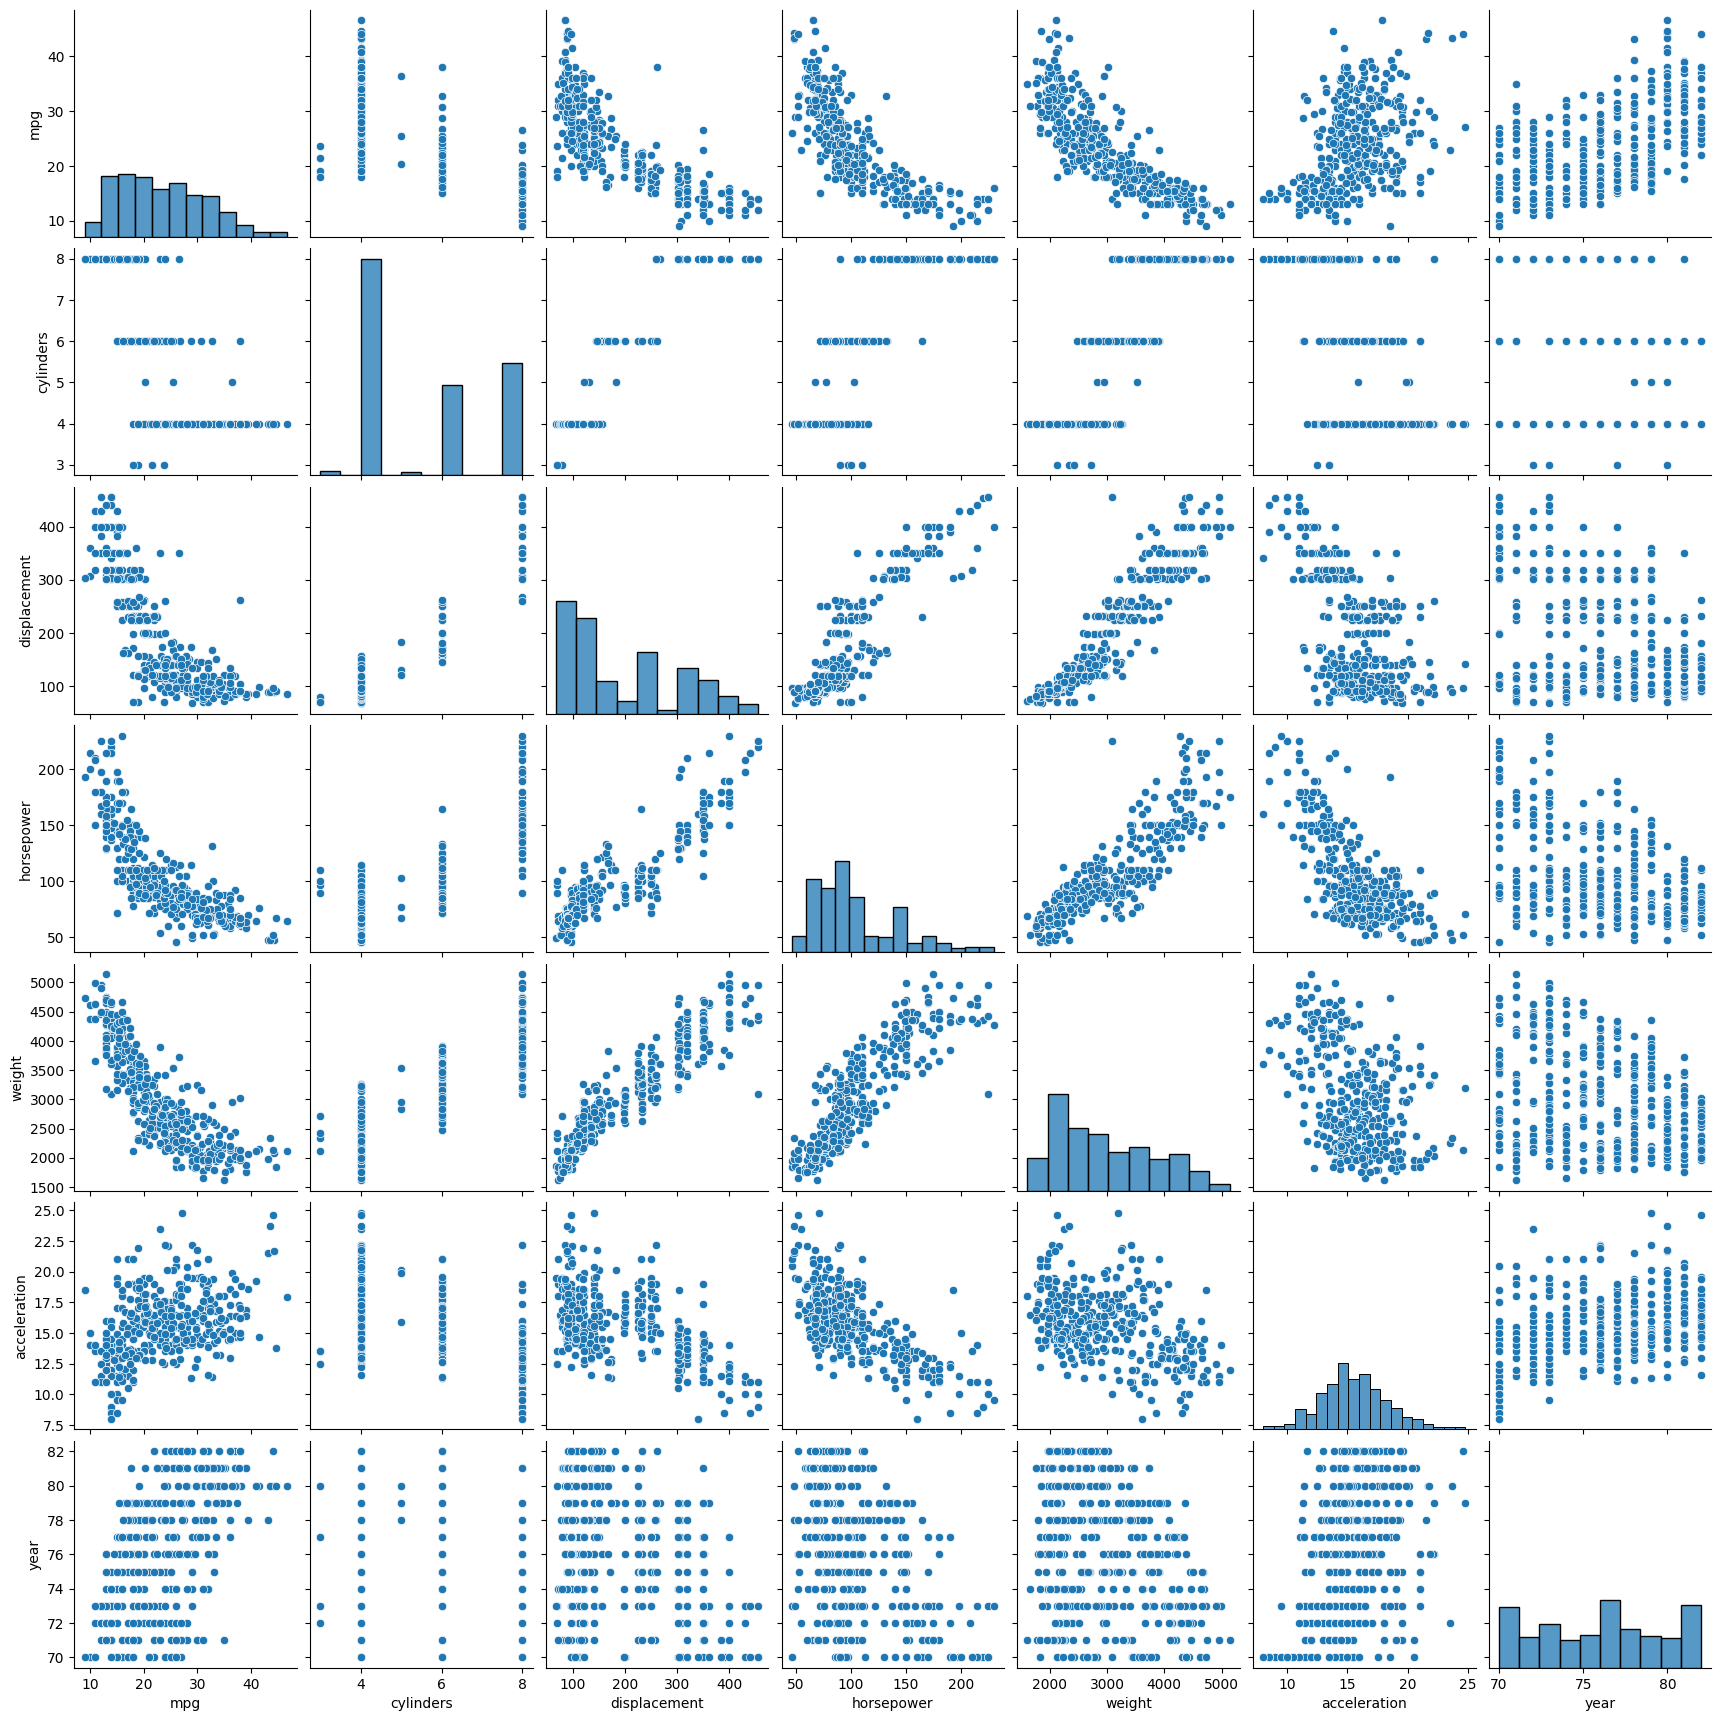

In [ ]:
sns.pairplot(auto[['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]);

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (5+5=**10 points total**)

###**Text Answer**###

An intriguing revelation from the correlation matrix indicates an unexpected negative correlation between `horsepower` and `miles per gallon (mpg)`. Common intuition would suggest that higher horsepower in a car typically equates to improved performance and, consequently, higher miles per gallon. Thus, one would anticipate a positive relationship between these variables. However, the correlation matrix highlights a substantial -0.78 correlation between them, diverging from the expected positive association. This surprising observation defies initial assumptions. However, upon further consideration, the rationale behind this negative relationship becomes clear. Higher horsepower demands more fuel to generate additional power, subsequently diminishing fuel efficiency and resulting in lower miles per gallon.

###**Coding Answer**###

In [ ]:
auto[['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


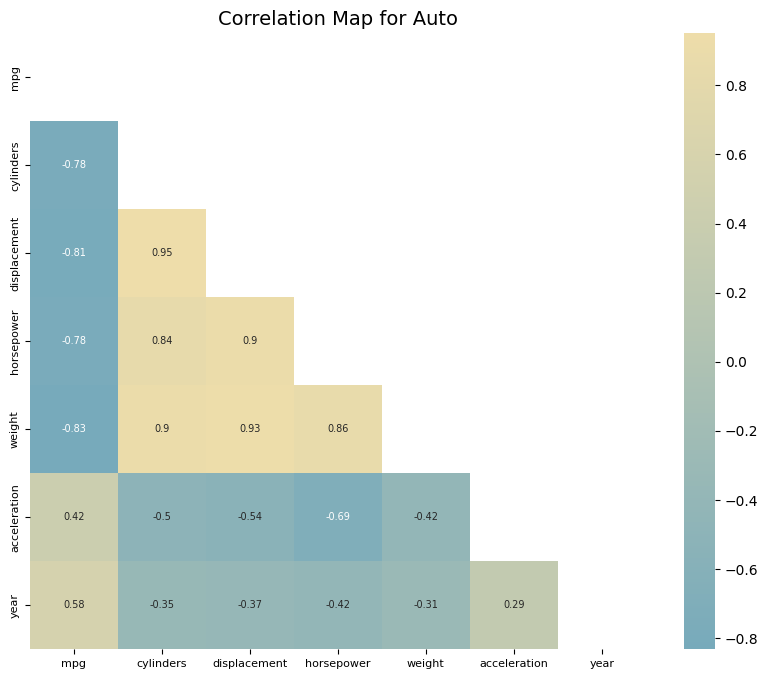

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix=auto[['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
cmap = sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, square=True, cmap=cmap, annot=True, annot_kws={"size": 7})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Map for Auto', size=14);

## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. (10 points) **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

###**Text Answer**###

1. When assessing the significance of various effects, I rely on the p-value as a metric to gauge the influence of different variables. A lower p-value for a specific variable indicates a more notable effect. After closely examining the p-values associated with each variable, it becomes evident that `origin`, `displacement`, `weight`, and `year` display statistically significant effects. This is attributed to their smaller p-values, all falling below the 0.05 threshold. In essence, these four numeric variables exert a significant impact on `mpg`, as opposed to having no discernible effect on it.

2. Upon inspection of the p-values, it's evident that `cylinders`, `horsepower`, and `acceleration` exhibit higher p-values, indicating their lack of statistical significance.
Remarkably, among these variables, `acceleration` demonstrates the highest p-value, suggesting its comparatively weaker impact. The lack of significance associated with the acceleration variable may stem from its indirect relationship with `miles per gallon (mpg)`. The time required for acceleration might be more closely linked to engine power, the transmission system, overall vehicle performance, or other underlying factors. It's plausible that engine power more directly affects miles per gallon, while acceleration time indirectly affects mpg through its influence on engine power. In essence, the duration for a car to accelerate from 0 to 60 mph might not exhibit a strong and direct correlation with miles per gallon due to its indirect relationship through factors like engine power and overall vehicle performance.

3. When converting `year` into a categorical variable, a noticeable observation is the variation in p-values for different years, indicating varying effects on `miles per gallon (mpg)`. Some specific years exhibit low p-values, suggesting a weaker influence on `mpg`. Conversely, when `year` is treated as a numeric variable, it demonstrates a stronger effect (p-values less than 0.05).
Transforming a numeric variable into a categorical one creates distinct dummy variables, adding parameters to the model. Through one-hot encoding, these dummy variables expand the model's complexity, potentially reducing the statistical significance of specific variables. This shift to categorical variables makes it more challenging to interpret variable effects, potentially leading to a loss of significance in the original numeric variable within the model. Interpreting this change requires considering factors associated with model complexity and the implications of transforming variables into categorical formats.

###**Coding Answer**###

In [ ]:
# import statsmodels.api as sm
import statsmodels.formula.api as smf

est = smf.ols('mpg ~ cylinders+displacement+horsepower+weight+acceleration+year+C(origin)', auto).fit()
print(est.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.839      0.000     -27.150      -8.759
C(origin)[T.2]     2.6300      0.566      4.643      0.000       1.516       3.744
C(origin)[T.3]     2.8532      0.553      5.162      0.000       1.766       3.940
cylinders         -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement       0.0240      0.008      3.133      0.002       0.009       0.039
horsepower        -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight            -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration       0.0791      0.098      0.805      0.421      -0.114       0.272
year               0.7770      0.052     15.005      0.000       0.675       0.879


In [ ]:
est = smf.ols('mpg ~ cylinders+displacement+horsepower+weight+acceleration+C(year)+C(origin)', auto).fit()
print(est.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.0199      2.142     17.285      0.000      32.808      41.231
C(year)[T.71]      1.0462      0.873      1.198      0.232      -0.670       2.763
C(year)[T.72]      0.0330      0.853      0.039      0.969      -1.644       1.711
C(year)[T.73]     -0.5323      0.772     -0.690      0.491      -2.050       0.985
C(year)[T.74]      1.6546      0.913      1.812      0.071      -0.141       3.450
C(year)[T.75]      0.9415      0.895      1.052      0.294      -0.819       2.702
C(year)[T.76]      1.7486      0.857      2.040      0.042       0.063       3.434
C(year)[T.77]      3.2399      0.876      3.699      0.000       1.517       4.962
C(year)[T.78]      3.0821      0.833      3.699      0.000       1.444       4.721
C(year)[T.79]      5.3813      0.879      6.121      0.000       3.652       7.110
C(ye

## Q5. From the above regression model in Q4, include two way interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


In [ ]:
est = smf.ols('mpg ~ displacement*C(origin)', auto).fit()
print(est.summary().tables[1])

                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      33.5576      0.777     43.181      0.000      32.030      35.086
C(origin)[T.2]                  9.7999      2.812      3.485      0.001       4.271      15.328
C(origin)[T.3]                  6.7869      2.437      2.785      0.006       1.995      11.578
displacement                   -0.0546      0.003    -18.721      0.000      -0.060      -0.049
displacement:C(origin)[T.2]    -0.0891      0.024     -3.662      0.000      -0.137      -0.041
displacement:C(origin)[T.3]    -0.0417      0.022     -1.883      0.060      -0.085       0.002


In the regression model analyzing the relationship between `displacement` (numeric) and `origin` (categorical), including interactions, it's evident that, with the exception of **displacement:C(origin)[T.3]**, all other variables display low p-values (less than 0.05), signifying a significant effect.

**displacement:C(origin)[T.2]** ,a statistically significant variable, represents the interaction effect between displacement and vehicles categorized as 2 (European). With a coefficient of -0.0891, this implies that for vehicles categorized as 2 (European), a 1-unit change in displacement corresponds to a 0.0891-unit change in the response variable.

In [ ]:
est = smf.ols('mpg ~ weight*C(origin)', auto).fit()
print(est.summary().tables[1])

                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.1485      1.186     36.378      0.000      40.816      45.481
C(origin)[T.2]            1.1247      2.878      0.391      0.696      -4.534       6.783
C(origin)[T.3]           11.1117      3.574      3.109      0.002       4.084      18.139
weight                   -0.0069      0.000    -20.020      0.000      -0.008      -0.006
weight:C(origin)[T.2]  3.575e-06      0.001      0.003      0.997      -0.002       0.002
weight:C(origin)[T.3]    -0.0039      0.002     -2.508      0.013      -0.007      -0.001


In the regression model examining the relationship between `displacement` (numeric) and `origin` (categorical) inclusive of interactions, it's apparent that, with the exception of **displacement:C(origin)[T.2]** and **C(origin)[T.2]**, other variables exhibit low p-values (below 0.05), indicating a significant effect.

**displacement:C(origin)[T.3]**, a statistically significant variable, exemplifies the interaction effect between displacement and vehicles categorized as 3 (Japanese). Exhibiting a coefficient of -0.0039, this implies that for vehicles categorized as 3 (Japanese), a 1-unit change in displacement corresponds to a 0.0039-unit change in the response variable.

In [ ]:
est = smf.ols('mpg ~ year*C(origin)', auto).fit()
print(est.summary().tables[1])

                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -66.2378      6.731     -9.840      0.000     -79.473     -53.003
C(origin)[T.2]         20.4800     15.310      1.338      0.182      -9.622      50.582
C(origin)[T.3]         23.2212     13.959      1.663      0.097      -4.225      50.667
year                    1.1413      0.089     12.831      0.000       0.966       1.316
year:C(origin)[T.2]    -0.1719      0.202     -0.850      0.396      -0.569       0.226
year:C(origin)[T.3]    -0.1926      0.181     -1.064      0.288      -0.549       0.163


From the regression model examining the relationship between `displacement` (numeric) and `origin` (categorical) with included interactions, it is noticeable that both the `origin` variable and its interactions with `year` exhibit high p-values (exceeding 0.05), signifying relatively weak effects.

## Q6. Measure the in-sample and out of sample $R^2$ of the model specified in Q4.1 using 80% data for training and 20% data for testing. **(10 points total)**

###**Coding Answer**###

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
D_train, D_test = train_test_split(auto, test_size = .2, random_state=42)

est = smf.ols('mpg ~ cylinders+displacement+horsepower+weight+acceleration+year+C(origin)', D_train).fit()
print(est.summary().tables[1])

print('in-sample r-square: {}'.format(est.rsquared))
predictions = est.predict(D_test)
print('out-of-sample r-square: {}'.format(r2_score(D_test.mpg, predictions)))

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -19.3319      5.446     -3.550      0.000     -30.048      -8.615
C(origin)[T.2]     2.8755      0.656      4.384      0.000       1.585       4.166
C(origin)[T.3]     3.2060      0.620      5.173      0.000       1.986       4.426
cylinders         -0.3421      0.370     -0.924      0.356      -1.071       0.387
displacement       0.0192      0.009      2.222      0.027       0.002       0.036
horsepower        -0.0216      0.016     -1.391      0.165      -0.052       0.009
weight            -0.0064      0.001     -8.833      0.000      -0.008      -0.005
acceleration       0.0422      0.110      0.384      0.701      -0.174       0.258
year               0.7972      0.060     13.196      0.000       0.678       0.916
in-sample r-square: 0.8286865575852228
out-of-sample r-square: 0.7922774714022078


## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts.

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you.

If you did not collaborate with anyone simply declare so.

Sample answer:

1. I discussed with Hazel for this homework. I needed her help with submission system and as a sounding board for the reasonableness of this homework.
2. I used ChatGPT with the following prompt to understand how to measure out of sample $R^2$:
> provide prompt here

Then I wrote the code that is submitted in the assignment.

3. I did not discuss with anyone or get any help from any generative AI tool.

###**Text Answer**###

1. I've been using ChatGPT to assist me in refining my text. As English isn't my native language, I often require help from ChatGPT to craft my content. After I draft my thoughts, I'll seek ChatGPT's assistance to refine the text by asking: 'Please help me revise this content.'
2. When responding to questions about surprising or interesting observations, I often inquire with ChatGPT by asking, "Why did this situation occur?" Also, I utilize Google to delve deeper into understanding the reasons behind it. Subsequently, I synthesize these insights to craft a comprehensive response.

